In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras import backend as K
from keras.optimizers import Adam, RMSprop
from util.plots import plot_history
from nets.cnn_net.cnn_net import cnn_net
from glob import glob
import util.image_import as ii
import os
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [3]:
train_path = '../dataset2/res_still/train'
valid_path = '../dataset2/res_still/valid'
test_path = '../dataset2/res_still/test'

batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        vertical_flip=True,
        horizontal_flip=True,
        brightness_range=(0.65, 1.35))

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=80,
        classes=['potato', 'catfood', 'table'])

Found 573 images belonging to 3 classes.
Found 160 images belonging to 3 classes.
Found 80 images belonging to 3 classes.


In [2]:
# Importing the images
train_pot = glob(os.path.join("../dataset2/res_still/train/potato", "*.jpg"))
train_cat = glob(os.path.join("../dataset2/res_still/train/catfood", "*.jpg"))
train_tab = glob(os.path.join("../dataset2/res_still/train/table", "*.jpg"))
val_pot   = glob(os.path.join("../dataset2/res_still/valid/potato", "*.jpg"))
val_cat   = glob(os.path.join("../dataset2/res_still/valid/catfood", "*.jpg"))
val_tab   = glob(os.path.join("../dataset2/res_still/valid/table", "*.jpg"))
test_pot  = glob(os.path.join("../dataset2/res_still/test/potato", "*.jpg"))
test_cat  = glob(os.path.join("../dataset2/res_still/test/catfood", "*.jpg"))
test_tab  = glob(os.path.join("../dataset2/res_still/test/table", "*.jpg"))

X_train, y_train = ii.images_to_numpy(train_pot, train_cat, train_tab)
X_val, y_val = ii.images_to_numpy(val_pot, val_cat, val_tab)
X_test, y_test = ii.images_to_numpy(test_pot, test_cat, test_tab)

batch_size = 32
num_classes = 3

# Making datagen for training with normilization, center, and dataugmentation
train_datagen = ImageDataGenerator(
        featurewise_center=True,
        #featurewise_std_normalization=True
        rescale=1./255,
        rotation_range=10,
        vertical_flip=True,
        horizontal_flip=True,
        brightness_range=(0.65, 1.35)
)

# Making datagen for validation and test with normilization
valid_datagen = ImageDataGenerator(
        featurewise_center=True, 
        #featurewise_std_normalization=True
        rescale=1./255
)


X_train = X_train.astype(float)
X_val = X_val.astype(float)
X_test = X_test.astype(float)

y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

# Required for featurewise normalization
train_datagen.fit(X_train/255.)
valid_datagen.fit(X_train/255.)

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=batch_size, shuffle=True)

validation_generator = valid_datagen.flow(X_val,
                                     y_val,
                                     batch_size=batch_size, shuffle=True)

test_generator = valid_datagen.flow(X_test,
                                     y_test,
                                     batch_size=80, shuffle=True)

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  #  3D activation map -> 1D vector
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5)) 
model.add(Dense(3))                                 # Conv2D prøve (5,5) i stedet for (3,3)
model.add(Activation('softmax'))                    # MaxPooling2D prøv (4,4) i stedet for (2,2)
                                                    # lr = [1e-2, 1e-3, 1e-4]
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, epsilon=10e-8),
              metrics=['accuracy'])

In [4]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=573 // batch_size,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=160 // batch_size)

Epoch 1/100
17/17 [==============================] - 6s 368ms/step - loss: 1.0683 - acc: 0.4789 - val_loss: 0.8383 - val_acc: 0.6250
Epoch 2/100
17/17 [==============================] - 6s 357ms/step - loss: 0.7173 - acc: 0.6900 - val_loss: 0.5402 - val_acc: 0.9187
Epoch 3/100
17/17 [==============================] - 6s 326ms/step - loss: 0.4484 - acc: 0.8207 - val_loss: 0.3458 - val_acc: 0.8313
Epoch 4/100
17/17 [==============================] - 5s 310ms/step - loss: 0.3778 - acc: 0.8441 - val_loss: 0.2105 - val_acc: 0.9437
Epoch 5/100
17/17 [==============================] - 5s 318ms/step - loss: 0.2691 - acc: 0.8970 - val_loss: 0.2060 - val_acc: 0.9812
Epoch 6/100
17/17 [==============================] - 5s 319ms/step - loss: 0.2700 - acc: 0.8968 - val_loss: 0.1321 - val_acc: 0.9812
Epoch 7/100
17/17 [==============================] - 6s 346ms/step - loss: 0.2540 - acc: 0.9044 - val_loss: 0.1563 - val_acc: 0.9750
Epoch 8/100
17/17 [==============================] - 16s 962ms/step -

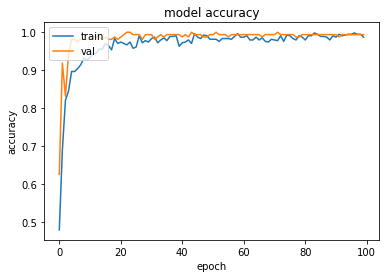

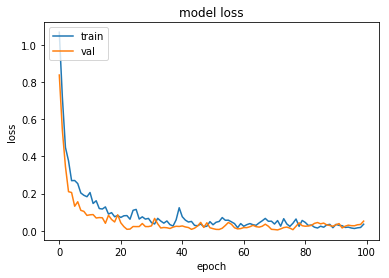

In [6]:
plot_history(history, save=True, path='nets/cnn_net/', name='cnn_full')

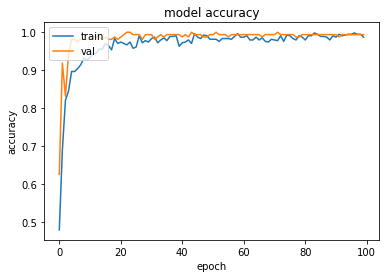

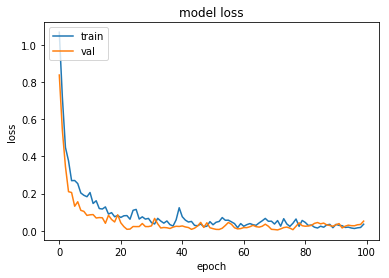

In [7]:
plot_history(history)

In [8]:
imgs, labels = next(test_generator)

model.evaluate(imgs,labels, batch_size=80)

80/80 [==============================] - 1s 7ms/step


[0.17603328824043274, 0.987500011920929]

In [9]:
# serialize model to JSON
model_json = model.to_json()
with open("nets/cnn_net/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("nets/cnn_net/model.h5")

In [9]:
# load json and create model
#json_file = open('model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
# load weights into new model
#loaded_model.load_weights("model.h5")
#print("Loaded model from disk")
 
# evaluate loaded model on test data
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#score = loaded_model.evaluate(X, Y, verbose=0)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
__________

## Hyperparameter optimization <span style="color:red"> DONE!</span>

In [3]:
# Only work with tensorflow=1.8 and keras=2.1.6 because of the memory allocation

# Hyperparameters
learning_rates = [1e-2, 1e-3, 1e-4];
Conv2D_values = [3, 5]
MaxPooling2D_values = [2, 4]

history = []
result = None
results = []

for lr in learning_rates:
    for c in Conv2D_values:
        for p in MaxPooling2D_values:
            # GPU memory allocation
            cfg = K.tf.ConfigProto() # Create setup file for keras tensorflow
            cfg.gpu_options.allow_growth = True # Setting setup file with dynamically adding gpu memory
            K.set_session(K.tf.Session(config=cfg)) # Setting session to use setup file
            sess = tf.Session() 
            K.set_session(sess)# set this TensorFlow session as the default session for Keras.

            # Defining the model:
            model = Sequential()
            model.add(Conv2D(32, (c, c), input_shape=(224, 224, 3)))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(p, p)))

            model.add(Conv2D(64, (c, c)))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(p, p)))

            model.add(Flatten())  #  3D activation map -> 1D vector
            model.add(Dense(32))
            model.add(Activation('relu'))
            model.add(Dropout(0.5)) 
            model.add(Dense(3))                                
            model.add(Activation('softmax'))                    
                                                            
            model.compile(loss='categorical_crossentropy',
                          optimizer=Adam(lr=lr, epsilon=10e-8),
                          metrics=['accuracy'])

            # Running the model:
            temp = (model.fit_generator(
                train_generator,
                steps_per_epoch=573 // batch_size,
                epochs=100,
                validation_data=validation_generator,
                validation_steps=160 // batch_size))

            # Saving the results
            history.append(temp)
            train_acc = temp.history['acc'].pop()
            val_acc = temp.history['val_acc'].pop()
            result = (lr, c, p, train_acc, val_acc)
            results.append(result)
            del model
            K.clear_session() # Clearing the session to clear out gpu memory


Epoch 1/100
17/17 [==============================] - 5s 300ms/step - loss: 6.7658 - acc: 0.3992 - val_loss: 0.7441 - val_acc: 0.6375
Epoch 2/100
17/17 [==============================] - 5s 282ms/step - loss: 0.9736 - acc: 0.6453 - val_loss: 0.6617 - val_acc: 0.6813
Epoch 3/100
17/17 [==============================] - 6s 324ms/step - loss: 0.6185 - acc: 0.7132 - val_loss: 0.6120 - val_acc: 0.7125
Epoch 4/100
17/17 [==============================] - 5s 307ms/step - loss: 0.5041 - acc: 0.7428 - val_loss: 0.4912 - val_acc: 0.7312
Epoch 5/100
17/17 [==============================] - 5s 320ms/step - loss: 0.5273 - acc: 0.7482 - val_loss: 0.5625 - val_acc: 0.9000
Epoch 6/100
17/17 [==============================] - 6s 365ms/step - loss: 0.5529 - acc: 0.7540 - val_loss: 0.5618 - val_acc: 0.6875
Epoch 7/100
17/17 [==============================] - 6s 356ms/step - loss: 0.5688 - acc: 0.7538 - val_loss: 0.5524 - val_acc: 0.6375
Epoch 8/100
17/17 [==============================] - 6s 346ms/step - 

17/17 [==============================] - 5s 301ms/step - loss: 0.1945 - acc: 0.9559 - val_loss: 0.0708 - val_acc: 0.9938
Epoch 63/100
17/17 [==============================] - 5s 296ms/step - loss: 0.1606 - acc: 0.9630 - val_loss: 0.0381 - val_acc: 0.9938
Epoch 64/100
17/17 [==============================] - 5s 294ms/step - loss: 0.1539 - acc: 0.9608 - val_loss: 0.1385 - val_acc: 0.9563
Epoch 65/100
17/17 [==============================] - 5s 294ms/step - loss: 0.1432 - acc: 0.9522 - val_loss: 0.0131 - val_acc: 0.9938
Epoch 66/100
17/17 [==============================] - 5s 301ms/step - loss: 0.0916 - acc: 0.9669 - val_loss: 0.0723 - val_acc: 0.9812
Epoch 67/100
17/17 [==============================] - 5s 289ms/step - loss: 0.1397 - acc: 0.9778 - val_loss: 0.0132 - val_acc: 0.9938
Epoch 68/100
17/17 [==============================] - 5s 288ms/step - loss: 0.0759 - acc: 0.9835 - val_loss: 0.0134 - val_acc: 0.9938
Epoch 69/100
17/17 [==============================] - 5s 296ms/step - loss:

Epoch 23/100
17/17 [==============================] - 5s 288ms/step - loss: 0.3118 - acc: 0.8525 - val_loss: 0.2366 - val_acc: 0.9812
Epoch 24/100
17/17 [==============================] - 5s 285ms/step - loss: 0.3320 - acc: 0.8474 - val_loss: 0.2815 - val_acc: 0.9500
Epoch 25/100
17/17 [==============================] - 5s 290ms/step - loss: 0.3672 - acc: 0.8178 - val_loss: 0.3570 - val_acc: 0.9688
Epoch 26/100
17/17 [==============================] - 5s 280ms/step - loss: 0.3284 - acc: 0.8728 - val_loss: 0.2397 - val_acc: 0.9812
Epoch 27/100
17/17 [==============================] - 5s 286ms/step - loss: 0.3354 - acc: 0.8654 - val_loss: 0.2608 - val_acc: 0.9688
Epoch 28/100
17/17 [==============================] - 5s 294ms/step - loss: 0.2280 - acc: 0.9007 - val_loss: 0.2395 - val_acc: 0.9688
Epoch 29/100
17/17 [==============================] - 5s 284ms/step - loss: 0.2236 - acc: 0.9095 - val_loss: 0.1878 - val_acc: 0.9875
Epoch 30/100
17/17 [==============================] - 5s 283ms

17/17 [==============================] - 5s 290ms/step - loss: 0.0854 - acc: 0.9687 - val_loss: 0.0718 - val_acc: 0.9875
Epoch 85/100
17/17 [==============================] - 5s 300ms/step - loss: 0.1249 - acc: 0.9632 - val_loss: 0.0664 - val_acc: 0.9875
Epoch 86/100
17/17 [==============================] - 5s 299ms/step - loss: 0.0955 - acc: 0.9741 - val_loss: 0.0626 - val_acc: 0.9875
Epoch 87/100
17/17 [==============================] - 5s 295ms/step - loss: 0.0785 - acc: 0.9721 - val_loss: 0.0719 - val_acc: 0.9875
Epoch 88/100
17/17 [==============================] - 5s 288ms/step - loss: 0.0804 - acc: 0.9706 - val_loss: 0.0689 - val_acc: 0.9875
Epoch 89/100
17/17 [==============================] - 5s 292ms/step - loss: 0.0851 - acc: 0.9667 - val_loss: 0.0720 - val_acc: 0.9875
Epoch 90/100
17/17 [==============================] - 5s 288ms/step - loss: 0.0929 - acc: 0.9559 - val_loss: 0.0763 - val_acc: 0.9812
Epoch 91/100
17/17 [==============================] - 5s 290ms/step - loss:

17/17 [==============================] - 5s 292ms/step - loss: 1.0844 - acc: 0.3908 - val_loss: 1.0822 - val_acc: 0.3750
Epoch 46/100
17/17 [==============================] - 5s 292ms/step - loss: 1.0750 - acc: 0.3750 - val_loss: 1.0823 - val_acc: 0.3750
Epoch 47/100
17/17 [==============================] - 5s 288ms/step - loss: 1.0826 - acc: 0.3505 - val_loss: 1.0823 - val_acc: 0.3750
Epoch 48/100
17/17 [==============================] - 5s 297ms/step - loss: 1.0803 - acc: 0.3787 - val_loss: 1.0823 - val_acc: 0.3750
Epoch 49/100
17/17 [==============================] - 5s 283ms/step - loss: 1.0865 - acc: 0.3534 - val_loss: 1.0822 - val_acc: 0.3750
Epoch 50/100
17/17 [==============================] - 5s 289ms/step - loss: 1.0709 - acc: 0.3603 - val_loss: 1.0823 - val_acc: 0.3750
Epoch 51/100
17/17 [==============================] - 5s 290ms/step - loss: 1.0788 - acc: 0.3693 - val_loss: 1.0824 - val_acc: 0.3750
Epoch 52/100
17/17 [==============================] - 5s 294ms/step - loss:

17/17 [==============================] - 5s 296ms/step - loss: 0.6617 - acc: 0.6746 - val_loss: 0.6941 - val_acc: 0.7875
Epoch 7/100
17/17 [==============================] - 5s 295ms/step - loss: 0.6210 - acc: 0.7065 - val_loss: 0.7974 - val_acc: 0.6312
Epoch 8/100
17/17 [==============================] - 5s 292ms/step - loss: 0.5879 - acc: 0.7092 - val_loss: 0.6574 - val_acc: 0.6750
Epoch 9/100
17/17 [==============================] - 5s 305ms/step - loss: 0.5461 - acc: 0.7132 - val_loss: 0.5489 - val_acc: 0.7000
Epoch 10/100
17/17 [==============================] - 5s 295ms/step - loss: 0.5081 - acc: 0.7562 - val_loss: 0.5236 - val_acc: 0.7063
Epoch 11/100
17/17 [==============================] - 5s 292ms/step - loss: 0.5164 - acc: 0.7172 - val_loss: 0.5152 - val_acc: 0.7188
Epoch 12/100
17/17 [==============================] - 5s 288ms/step - loss: 0.4743 - acc: 0.7411 - val_loss: 0.4806 - val_acc: 0.7438
Epoch 13/100
17/17 [==============================] - 5s 288ms/step - loss: 0.

17/17 [==============================] - 5s 285ms/step - loss: 0.4333 - acc: 0.8036 - val_loss: 0.4735 - val_acc: 0.7375
Epoch 68/100
17/17 [==============================] - 5s 285ms/step - loss: 0.3960 - acc: 0.8199 - val_loss: 0.4768 - val_acc: 0.7375
Epoch 69/100
17/17 [==============================] - 5s 286ms/step - loss: 0.3866 - acc: 0.8016 - val_loss: 0.4667 - val_acc: 0.7312
Epoch 70/100
17/17 [==============================] - 5s 281ms/step - loss: 0.3999 - acc: 0.8309 - val_loss: 0.4725 - val_acc: 0.7250
Epoch 71/100
17/17 [==============================] - 5s 308ms/step - loss: 0.3764 - acc: 0.8321 - val_loss: 0.4687 - val_acc: 0.7375
Epoch 72/100
17/17 [==============================] - 5s 303ms/step - loss: 0.3772 - acc: 0.8318 - val_loss: 0.4602 - val_acc: 0.7312
Epoch 73/100
17/17 [==============================] - 5s 294ms/step - loss: 0.3485 - acc: 0.8474 - val_loss: 0.4684 - val_acc: 0.7312
Epoch 74/100
17/17 [==============================] - 5s 287ms/step - loss:

17/17 [==============================] - 5s 297ms/step - loss: 0.0500 - acc: 0.9816 - val_loss: 0.0450 - val_acc: 0.9812
Epoch 29/100
17/17 [==============================] - 5s 302ms/step - loss: 0.0685 - acc: 0.9778 - val_loss: 0.0428 - val_acc: 0.9812
Epoch 30/100
17/17 [==============================] - 5s 293ms/step - loss: 0.0763 - acc: 0.9779 - val_loss: 0.0255 - val_acc: 0.9875
Epoch 31/100
17/17 [==============================] - 5s 317ms/step - loss: 0.0629 - acc: 0.9741 - val_loss: 0.0223 - val_acc: 0.9875
Epoch 32/100
17/17 [==============================] - 5s 320ms/step - loss: 0.0600 - acc: 0.9743 - val_loss: 0.0211 - val_acc: 0.9875
Epoch 33/100
17/17 [==============================] - 5s 300ms/step - loss: 0.0698 - acc: 0.9664 - val_loss: 0.0185 - val_acc: 0.9938
Epoch 34/100
17/17 [==============================] - 5s 286ms/step - loss: 0.0847 - acc: 0.9667 - val_loss: 0.0190 - val_acc: 0.9938
Epoch 35/100
17/17 [==============================] - 5s 286ms/step - loss:

17/17 [==============================] - 5s 295ms/step - loss: 0.0486 - acc: 0.9739 - val_loss: 0.0106 - val_acc: 0.9938
Epoch 90/100
17/17 [==============================] - 5s 297ms/step - loss: 0.0316 - acc: 0.9926 - val_loss: 0.0184 - val_acc: 0.9938
Epoch 91/100
17/17 [==============================] - 5s 298ms/step - loss: 0.0338 - acc: 0.9853 - val_loss: 0.0145 - val_acc: 0.9938
Epoch 92/100
17/17 [==============================] - 5s 286ms/step - loss: 0.0400 - acc: 0.9925 - val_loss: 0.0103 - val_acc: 0.9938
Epoch 93/100
17/17 [==============================] - 5s 286ms/step - loss: 0.0348 - acc: 0.9890 - val_loss: 0.0217 - val_acc: 0.9938
Epoch 94/100
17/17 [==============================] - 5s 286ms/step - loss: 0.0414 - acc: 0.9816 - val_loss: 0.0145 - val_acc: 0.9938
Epoch 95/100
17/17 [==============================] - 5s 292ms/step - loss: 0.0220 - acc: 0.9926 - val_loss: 0.0185 - val_acc: 0.9938
Epoch 96/100
17/17 [==============================] - 5s 285ms/step - loss:

17/17 [==============================] - 6s 326ms/step - loss: 0.1863 - acc: 0.9463 - val_loss: 0.0837 - val_acc: 0.9750
Epoch 51/100
17/17 [==============================] - 5s 320ms/step - loss: 0.1598 - acc: 0.9669 - val_loss: 0.0574 - val_acc: 0.9875
Epoch 52/100
17/17 [==============================] - 6s 326ms/step - loss: 0.1683 - acc: 0.9573 - val_loss: 0.0650 - val_acc: 0.9875
Epoch 53/100
17/17 [==============================] - 6s 338ms/step - loss: 0.1437 - acc: 0.9721 - val_loss: 0.0611 - val_acc: 0.9875
Epoch 54/100
17/17 [==============================] - 5s 318ms/step - loss: 0.1510 - acc: 0.9553 - val_loss: 0.0505 - val_acc: 0.9875
Epoch 55/100
17/17 [==============================] - 6s 326ms/step - loss: 0.1616 - acc: 0.9632 - val_loss: 0.0594 - val_acc: 0.9875
Epoch 56/100
17/17 [==============================] - 6s 324ms/step - loss: 0.1477 - acc: 0.9704 - val_loss: 0.0601 - val_acc: 0.9875
Epoch 57/100
17/17 [==============================] - 6s 328ms/step - loss:

17/17 [==============================] - 6s 337ms/step - loss: 0.2463 - acc: 0.9244 - val_loss: 0.1427 - val_acc: 0.9875
Epoch 12/100
17/17 [==============================] - 6s 341ms/step - loss: 0.2923 - acc: 0.8890 - val_loss: 0.2339 - val_acc: 0.9125
Epoch 13/100
17/17 [==============================] - 6s 342ms/step - loss: 0.2874 - acc: 0.9077 - val_loss: 0.1516 - val_acc: 0.9812
Epoch 14/100
17/17 [==============================] - 6s 342ms/step - loss: 0.2669 - acc: 0.9070 - val_loss: 0.0703 - val_acc: 0.9812
Epoch 15/100
17/17 [==============================] - 6s 332ms/step - loss: 0.2341 - acc: 0.9373 - val_loss: 0.0783 - val_acc: 0.9812
Epoch 16/100
17/17 [==============================] - 6s 336ms/step - loss: 0.2124 - acc: 0.9189 - val_loss: 0.0827 - val_acc: 0.9750
Epoch 17/100
17/17 [==============================] - 6s 345ms/step - loss: 0.2248 - acc: 0.9239 - val_loss: 0.0806 - val_acc: 0.9812
Epoch 18/100
17/17 [==============================] - 6s 344ms/step - loss:

17/17 [==============================] - 5s 292ms/step - loss: 0.1263 - acc: 0.9667 - val_loss: 0.0090 - val_acc: 1.0000
Epoch 73/100
17/17 [==============================] - 5s 294ms/step - loss: 0.1065 - acc: 0.9779 - val_loss: 0.0327 - val_acc: 0.9812
Epoch 74/100
17/17 [==============================] - 5s 287ms/step - loss: 0.1221 - acc: 0.9739 - val_loss: 0.0264 - val_acc: 0.9875
Epoch 75/100
17/17 [==============================] - 5s 294ms/step - loss: 0.0864 - acc: 0.9761 - val_loss: 0.0172 - val_acc: 0.9938
Epoch 76/100
17/17 [==============================] - 5s 290ms/step - loss: 0.0962 - acc: 0.9722 - val_loss: 0.0123 - val_acc: 0.9938
Epoch 77/100
17/17 [==============================] - 5s 301ms/step - loss: 0.1100 - acc: 0.9798 - val_loss: 0.0160 - val_acc: 0.9938
Epoch 78/100
17/17 [==============================] - 5s 293ms/step - loss: 0.0626 - acc: 0.9794 - val_loss: 0.0091 - val_acc: 1.0000
Epoch 79/100
17/17 [==============================] - 5s 289ms/step - loss:

17/17 [==============================] - 6s 331ms/step - loss: 0.1305 - acc: 0.9428 - val_loss: 0.0898 - val_acc: 0.9812
Epoch 34/100
17/17 [==============================] - 6s 330ms/step - loss: 0.1301 - acc: 0.9518 - val_loss: 0.0860 - val_acc: 0.9812
Epoch 35/100
17/17 [==============================] - 6s 335ms/step - loss: 0.1547 - acc: 0.9522 - val_loss: 0.0775 - val_acc: 0.9812
Epoch 36/100
17/17 [==============================] - 6s 325ms/step - loss: 0.1374 - acc: 0.9467 - val_loss: 0.0724 - val_acc: 0.9812
Epoch 37/100
17/17 [==============================] - 6s 340ms/step - loss: 0.1401 - acc: 0.9320 - val_loss: 0.0699 - val_acc: 0.9812
Epoch 38/100
17/17 [==============================] - 6s 339ms/step - loss: 0.1306 - acc: 0.9430 - val_loss: 0.0680 - val_acc: 0.9875
Epoch 39/100
17/17 [==============================] - 6s 338ms/step - loss: 0.1413 - acc: 0.9426 - val_loss: 0.0737 - val_acc: 0.9812
Epoch 40/100
17/17 [==============================] - 5s 321ms/step - loss:

17/17 [==============================] - 6s 329ms/step - loss: 0.0848 - acc: 0.9779 - val_loss: 0.0307 - val_acc: 0.9875
Epoch 95/100
17/17 [==============================] - 6s 333ms/step - loss: 0.0787 - acc: 0.9743 - val_loss: 0.0435 - val_acc: 0.9875
Epoch 96/100
17/17 [==============================] - 6s 327ms/step - loss: 0.0717 - acc: 0.9742 - val_loss: 0.0462 - val_acc: 0.9875
Epoch 97/100
17/17 [==============================] - 6s 334ms/step - loss: 0.0682 - acc: 0.9757 - val_loss: 0.0335 - val_acc: 0.9875
Epoch 98/100
17/17 [==============================] - 6s 328ms/step - loss: 0.0789 - acc: 0.9722 - val_loss: 0.0431 - val_acc: 0.9875
Epoch 99/100
17/17 [==============================] - 6s 327ms/step - loss: 0.1021 - acc: 0.9779 - val_loss: 0.0518 - val_acc: 0.9875
Epoch 100/100
17/17 [==============================] - 6s 329ms/step - loss: 0.0748 - acc: 0.9759 - val_loss: 0.0374 - val_acc: 0.9875
Epoch 1/100
17/17 [==============================] - 6s 346ms/step - loss:

17/17 [==============================] - 6s 332ms/step - loss: 0.2766 - acc: 0.8562 - val_loss: 0.1225 - val_acc: 0.9812
Epoch 56/100
17/17 [==============================] - 6s 335ms/step - loss: 0.2236 - acc: 0.8853 - val_loss: 0.1148 - val_acc: 0.9875
Epoch 57/100
17/17 [==============================] - 6s 333ms/step - loss: 0.2311 - acc: 0.8901 - val_loss: 0.0942 - val_acc: 0.9812
Epoch 58/100
17/17 [==============================] - 6s 343ms/step - loss: 0.2107 - acc: 0.9265 - val_loss: 0.1072 - val_acc: 0.9812
Epoch 59/100
17/17 [==============================] - 6s 332ms/step - loss: 0.2578 - acc: 0.8755 - val_loss: 0.1134 - val_acc: 0.9812
Epoch 60/100
17/17 [==============================] - 6s 334ms/step - loss: 0.2176 - acc: 0.9081 - val_loss: 0.1056 - val_acc: 0.9750
Epoch 61/100
17/17 [==============================] - 6s 335ms/step - loss: 0.2374 - acc: 0.8801 - val_loss: 0.0915 - val_acc: 0.9812
Epoch 62/100
17/17 [==============================] - 6s 337ms/step - loss:

17/17 [==============================] - 5s 280ms/step - loss: 0.5523 - acc: 0.8130 - val_loss: 0.5091 - val_acc: 0.8875
Epoch 17/100
17/17 [==============================] - 5s 287ms/step - loss: 0.5494 - acc: 0.8136 - val_loss: 0.4781 - val_acc: 0.8938
Epoch 18/100
17/17 [==============================] - 5s 284ms/step - loss: 0.5188 - acc: 0.8320 - val_loss: 0.4599 - val_acc: 0.8938
Epoch 19/100
17/17 [==============================] - 5s 282ms/step - loss: 0.4931 - acc: 0.8597 - val_loss: 0.4366 - val_acc: 0.9250
Epoch 20/100
17/17 [==============================] - 5s 286ms/step - loss: 0.4866 - acc: 0.8481 - val_loss: 0.4210 - val_acc: 0.9250
Epoch 21/100
17/17 [==============================] - 5s 281ms/step - loss: 0.4755 - acc: 0.8794 - val_loss: 0.4021 - val_acc: 0.9250
Epoch 22/100
17/17 [==============================] - 5s 280ms/step - loss: 0.4327 - acc: 0.8818 - val_loss: 0.3813 - val_acc: 0.9250
Epoch 23/100
17/17 [==============================] - 5s 283ms/step - loss:

17/17 [==============================] - 5s 280ms/step - loss: 0.1759 - acc: 0.9355 - val_loss: 0.1303 - val_acc: 0.9688
Epoch 78/100
17/17 [==============================] - 5s 281ms/step - loss: 0.1598 - acc: 0.9428 - val_loss: 0.1559 - val_acc: 0.9563
Epoch 79/100
17/17 [==============================] - 5s 285ms/step - loss: 0.1647 - acc: 0.9539 - val_loss: 0.1316 - val_acc: 0.9625
Epoch 80/100
17/17 [==============================] - 5s 284ms/step - loss: 0.1766 - acc: 0.9577 - val_loss: 0.1634 - val_acc: 0.9500
Epoch 81/100
17/17 [==============================] - 5s 283ms/step - loss: 0.1794 - acc: 0.9537 - val_loss: 0.1608 - val_acc: 0.9500
Epoch 82/100
17/17 [==============================] - 5s 282ms/step - loss: 0.1678 - acc: 0.9476 - val_loss: 0.1543 - val_acc: 0.9500
Epoch 83/100
17/17 [==============================] - 5s 282ms/step - loss: 0.1654 - acc: 0.9406 - val_loss: 0.1744 - val_acc: 0.9500
Epoch 84/100
17/17 [==============================] - 5s 281ms/step - loss:

17/17 [==============================] - 5s 284ms/step - loss: 0.1845 - acc: 0.9221 - val_loss: 0.1068 - val_acc: 0.9812
Epoch 39/100
17/17 [==============================] - 5s 282ms/step - loss: 0.1738 - acc: 0.9187 - val_loss: 0.0857 - val_acc: 0.9875
Epoch 40/100
17/17 [==============================] - 5s 287ms/step - loss: 0.2004 - acc: 0.8915 - val_loss: 0.0734 - val_acc: 0.9875
Epoch 41/100
17/17 [==============================] - 5s 282ms/step - loss: 0.1698 - acc: 0.9180 - val_loss: 0.0675 - val_acc: 0.9875
Epoch 42/100
17/17 [==============================] - 5s 287ms/step - loss: 0.2109 - acc: 0.8989 - val_loss: 0.0975 - val_acc: 0.9812
Epoch 43/100
17/17 [==============================] - 5s 282ms/step - loss: 0.1827 - acc: 0.9125 - val_loss: 0.0799 - val_acc: 0.9875
Epoch 44/100
17/17 [==============================] - 5s 284ms/step - loss: 0.1679 - acc: 0.9070 - val_loss: 0.0778 - val_acc: 0.9812
Epoch 45/100
17/17 [==============================] - 5s 284ms/step - loss:

17/17 [==============================] - 5s 283ms/step - loss: 0.1100 - acc: 0.9320 - val_loss: 0.0268 - val_acc: 0.9875
Epoch 100/100
17/17 [==============================] - 5s 284ms/step - loss: 0.1098 - acc: 0.9520 - val_loss: 0.0218 - val_acc: 0.9875
Epoch 1/100
17/17 [==============================] - 5s 289ms/step - loss: 1.0797 - acc: 0.3900 - val_loss: 1.0486 - val_acc: 0.4688
Epoch 2/100
17/17 [==============================] - 5s 282ms/step - loss: 1.0308 - acc: 0.4197 - val_loss: 1.0011 - val_acc: 0.3937
Epoch 3/100
17/17 [==============================] - 5s 288ms/step - loss: 0.9695 - acc: 0.5304 - val_loss: 0.9503 - val_acc: 0.5437
Epoch 4/100
17/17 [==============================] - 5s 289ms/step - loss: 0.9308 - acc: 0.5396 - val_loss: 0.9131 - val_acc: 0.5125
Epoch 5/100
17/17 [==============================] - 5s 285ms/step - loss: 0.8933 - acc: 0.5423 - val_loss: 0.8573 - val_acc: 0.5750
Epoch 6/100
17/17 [==============================] - 5s 279ms/step - loss: 0.83

17/17 [==============================] - 5s 305ms/step - loss: 0.1544 - acc: 0.9559 - val_loss: 0.1235 - val_acc: 0.9750
Epoch 61/100
17/17 [==============================] - 5s 293ms/step - loss: 0.1787 - acc: 0.9537 - val_loss: 0.1263 - val_acc: 0.9688
Epoch 62/100
17/17 [==============================] - 5s 284ms/step - loss: 0.1664 - acc: 0.9449 - val_loss: 0.1206 - val_acc: 0.9750
Epoch 63/100
17/17 [==============================] - 5s 283ms/step - loss: 0.1695 - acc: 0.9518 - val_loss: 0.1563 - val_acc: 0.9563
Epoch 64/100
17/17 [==============================] - 5s 287ms/step - loss: 0.1440 - acc: 0.9614 - val_loss: 0.1171 - val_acc: 0.9750
Epoch 65/100
17/17 [==============================] - 5s 282ms/step - loss: 0.1316 - acc: 0.9651 - val_loss: 0.1500 - val_acc: 0.9563
Epoch 66/100
17/17 [==============================] - 5s 289ms/step - loss: 0.1654 - acc: 0.9522 - val_loss: 0.1257 - val_acc: 0.9688
Epoch 67/100
17/17 [==============================] - 5s 285ms/step - loss:

#### Printing all results and plotting only the best validation accuracy

In [4]:
best_valacc_indices = []
highest_valacc = 0
for index, r in enumerate(results):
    print('learning rate %e conv size %i pool size %i train accuracy: %f val accuracy: %f' % r) 
    if highest_valacc < r[4]:
        best_valacc_indices = [] # Empty the list because of better value
        best_valacc_indices.append(index)
        highest_valacc = r[4]
    elif highest_valacc == r[4]:
        best_valacc_indices.append(index)

learning rate 1.000000e-02 conv size 3 pool size 2 train accuracy: 0.964880 val accuracy: 1.000000
learning rate 1.000000e-02 conv size 3 pool size 4 train accuracy: 0.972274 val accuracy: 0.981250
learning rate 1.000000e-02 conv size 5 pool size 2 train accuracy: 0.378928 val accuracy: 0.375000
learning rate 1.000000e-02 conv size 5 pool size 4 train accuracy: 0.788104 val accuracy: 0.737500
learning rate 1.000000e-03 conv size 3 pool size 2 train accuracy: 0.979779 val accuracy: 0.993750
learning rate 1.000000e-03 conv size 3 pool size 4 train accuracy: 0.987132 val accuracy: 0.987500
learning rate 1.000000e-03 conv size 5 pool size 2 train accuracy: 0.975836 val accuracy: 0.993750
learning rate 1.000000e-03 conv size 5 pool size 4 train accuracy: 0.975970 val accuracy: 0.987500
learning rate 1.000000e-04 conv size 3 pool size 2 train accuracy: 0.918669 val accuracy: 0.987500
learning rate 1.000000e-04 conv size 3 pool size 4 train accuracy: 0.972274 val accuracy: 0.950000
learning r

______________________________________________________________________
learning rate 1.000000e-02 conv size 3 pool size 2 train accuracy: 0.964880 val accuracy: 1.000000


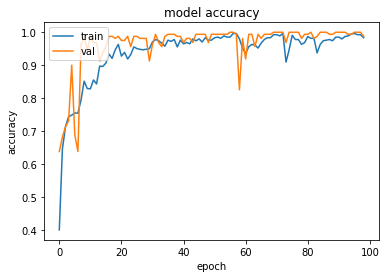

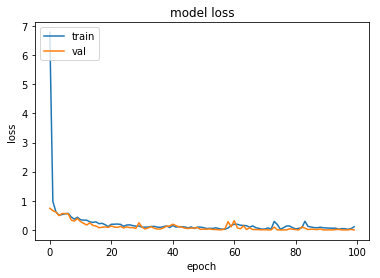

In [5]:
for indices in best_valacc_indices:
    print("______________________________________________________________________")
    print('learning rate %e conv size %i pool size %i train accuracy: %f val accuracy: %f' % results[indices])         
    plot_history(history[indices], mean_N=1)

**Based on graph and results above of the training and validation accuracy the following hyperparameters is found to be the optimal:** 
```
Learning rate       = 1e-2
Convolutional size  = (3,3)
Pooling size        = (2,2)
```
**Which gives the following results for 100 epoch for 1 training run:**
```
Train accuracy      = 0.964880
Validation accuracy = 1.000000
```